# Exploratory and explanatory data analysis of the FordGo Bike dataset

In this jupyter notebook, the Ford GoBike System Data is studied. This part of the project is mainly concerned by the basic exploration of the dataset

In [1]:
# external imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


### Data loading

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

### What kind of information one can find in the following dataset?

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Do we have many missing values in the dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<b>Comment:</b> This first visual and programmatical analysys allows to see that we can find here the information about users and their usage of the bike system.
    

In [7]:
# counting missing values
df.shape[0] - df.dropna().shape[0]

8460

In [8]:
# counting missing values in percentage
(df.shape[0] - df.dropna().shape[0])/df.shape[0]*100

4.612566244302445

Only 4.6% of values are missing. We are going to remove rows with missing values.

In [9]:
df_copy = df.copy()

In [10]:
# removing rows with missing values
df_copy.dropna(inplace=True)

In [11]:
df_copy.shape

(174952, 16)

In [12]:
df_copy.drop_duplicates(inplace=True)

In [13]:
df_copy.shape

(174952, 16)

In [14]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### Do we have appropriate datatype for each column of our dataset?

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

<b>Comment:</b> The datatypes of following columns should be modified:
<ul>
 <li><i>start_time</i> should be changed to the datetime</li>
 <li><i>end_time</i> should be changed to the datetime</li>
 <li><i>start_station_id</i> is changed to the integer datatype</li>
 <li><i>user_type</i> is changed to the category datatype</li>
 <li><i>member_birth_year</i> is changed to the integer datatype</li>
  <li><i>member_gender</i> is changed to the category datatype</li>
  <li><i>bike_share_for_all_trip</i> is changed to the category datatype</li> 
</ul>

In [16]:
# start_time should be changed to the datetime
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])

In [17]:
# end_time should be changed to the datetime
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

In [18]:
# start_station_id is changed to the integer datatype
df_copy['start_station_id'] = df_copy['start_station_id'].astype('int64')

In [19]:
# user_type is changed to the category datatype
df_copy['user_type'] = df_copy['user_type'].astype('category')

In [20]:
# member_birth_year is changed to the integer datatype and to the age
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype('int64')

In [21]:
# We remove rows with gender as other as it does not add any useful information
df_copy = df_copy[df_copy['member_gender'] != "Other"]
# member_gender is changed to the category datatype
df_copy['member_gender'] = df_copy['member_gender'].astype('category')


In [22]:
# member_gender is changed to the category datatype
df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype('category')

<b>Test</b>

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171305 non-null  int64         
 1   start_time               171305 non-null  datetime64[ns]
 2   end_time                 171305 non-null  datetime64[ns]
 3   start_station_id         171305 non-null  int64         
 4   start_station_name       171305 non-null  object        
 5   start_station_latitude   171305 non-null  float64       
 6   start_station_longitude  171305 non-null  float64       
 7   end_station_id           171305 non-null  float64       
 8   end_station_name         171305 non-null  object        
 9   end_station_latitude     171305 non-null  float64       
 10  end_station_longitude    171305 non-null  float64       
 11  bike_id                  171305 non-null  int64         
 12  user_type       

### Can we do some data engineering of the following dataset and extract some additional useful data?

<b>Comment:</b> The following information can be obtained by combining information from the initial dataset:
<ul>
    <li><i>start_time</i> column can be used to extract the days of a week and the months of the year</li>
    <li>The <i>start_time</i> and <i>end_time</i>  columns can be used to get the duration of the bike trip.  Normally it should similar value as the column <i>duration_sec</i>. The analysys of the duration time in second is not very revealing. Thus, we change it to minutes.</li>
    <li><i>member_birth_year</i> can be used to get the age of each user</li>
    <li>Columns:<i>start_station_latitude</i>, <i>start_station_longitude</i>, <i>end_station_latitude  </i> and <i>end_station_longitude </i>  can be used to obtain the distance of between starting station and the ending station.</li>
    
</ul>

In [24]:
days_dic =  {0:'Monday',
             1:'Tuesday',
             2:'Wednesday',
             3:'Thursday',
             4:'Friday',
             5:'Saturday',
             6:'Sunday'}

In [25]:
# start_time column can be used to extract the days of a week and the months of the year
df_copy["day"] = df_copy["start_time"].dt.dayofweek.astype('int').apply(lambda x:days_dic.get(x)).astype('category')
df_copy["year"] = df_copy["start_time"].dt.year.astype('int')

In [26]:
df_copy["day"].value_counts()

Thursday     32984
Tuesday      30022
Wednesday    27825
Friday       27083
Monday       25106
Sunday       14183
Saturday     14102
Name: day, dtype: int64

In [27]:
# The start_time and end_time columns can be used to get the duration of the bike trip. Normally it should similar value as the column duration_sec.
((df_copy.end_time - df_copy.start_time) // pd.Timedelta('1s')).head(3)

0    52185
2    61854
4     1585
dtype: int64

<b>Comment:</b> The <i>duration_sec</i> column corresponds to the deltatime obtained by the difference between the <i>start_time</i> and <i>end_time</i>  columns. Thus, there is no need to create an extra column.

In [28]:
df_copy["duration_min"] = df_copy.duration_sec/60

In [29]:
df_copy = df_copy.drop(["duration_sec"],axis = 1)

In [30]:
df_copy.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,year,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,2019,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,2019,1030.900000
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday,2019,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thursday,2019,29.883333
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,Thursday,2019,19.116667


In [31]:
df_copy["member_birth_year"].describe()

count    171305.000000
mean       1984.839351
std          10.116083
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [32]:
# member_birth_year can be used to get the age of each user
df_copy["age"] = df_copy["year"] - df_copy.member_birth_year
df_copy['age_group'] = pd.cut(df_copy['age'], bins=[0, 25, 30, 35, 40,45,60,101])
df_copy['age_group2'] = pd.cut(df_copy['age'], bins=[0, 25,67,101])

In [33]:
sum(df_copy["age"]>100)

71

<b>Comment:</b> There is probably an error as we can find 72 people who are older than 100 years. I have decided to remove this rows as they don't seem to be representative.

In [34]:
df_copy = df_copy.loc[df_copy["age"]<100,:]

In [35]:
sum(df_copy["age"]>100)

0

In [36]:
df_copy["age"].head(3)

0    35
2    47
4    45
Name: age, dtype: int64

<b>Comment:</b> In order two get the distance in km between the starting station and the ending station, we are going to use the formula for the distance from the towardsdatascience.com article that one may find here:
https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4

The function <i>get_haversine_distance</i> found in this article allows to compute the distance between two locations.

In [37]:
def get_haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

Columns:start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude can be used to obtain the distance of between starting station and the ending station.

In [38]:
lat1 = df_copy.start_station_latitude
lon1 = df_copy. start_station_longitude
lat2 = df_copy.end_station_latitude
lon2 = df_copy.end_station_longitude
df_copy["distance_between_stations"] = get_haversine_distance(lat1, lon1, lat2, lon2)

In [39]:
df_copy["distance_between_stations"].head()

0    0.54
2    2.70
4    2.41
5    3.33
6    2.03
Name: distance_between_stations, dtype: float64

<b>Comment:</b> Values obtained in this column seem to be reasonable for bike trips.

In [40]:
df_copy.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,member_birth_year,member_gender,bike_share_for_all_trip,day,year,duration_min,age,age_group,age_group2,distance_between_stations
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,...,1984,Male,No,Thursday,2019,869.750000,35,"(30, 35]","(25, 67]",0.54
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,...,1972,Male,No,Thursday,2019,1030.900000,47,"(45, 60]","(25, 67]",2.70
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,...,1974,Male,Yes,Thursday,2019,26.416667,45,"(40, 45]","(25, 67]",2.41
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,...,1959,Male,No,Thursday,2019,29.883333,60,"(45, 60]","(25, 67]",3.33
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,...,1983,Female,No,Thursday,2019,19.116667,36,"(35, 40]","(25, 67]",2.03


In [41]:
df_copy.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'day', 'year', 'duration_min', 'age',
       'age_group', 'age_group2', 'distance_between_stations'],
      dtype='object')

### Univariate Exploration

In [42]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

<b>Duration_min variable</b> 

Text(0.5, 0, 'Duration of the trip in minutes')

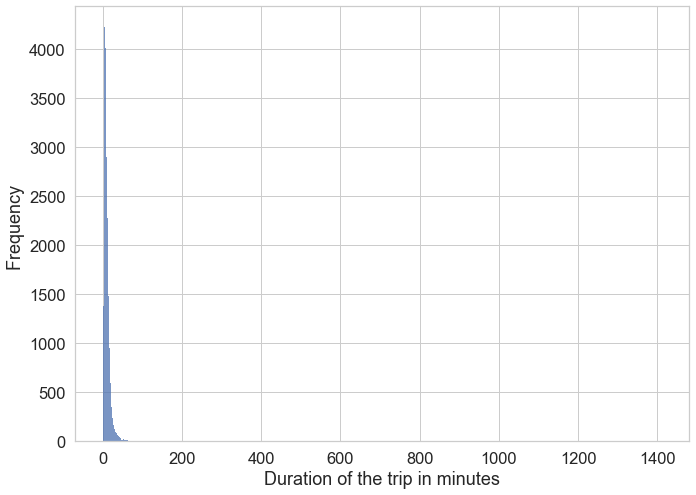

In [65]:
# exploring the duration time in minutes
sns.histplot(data=df_copy, x="duration_min")
plt.ylabel('Frequency ')
plt.xlabel('Duration of the trip in minutes')

<b>Comment:</b> We don't see much beceause of the presence of outliers.

Text(0.5, 0, 'Duration of the trip on the logarithmic scale')

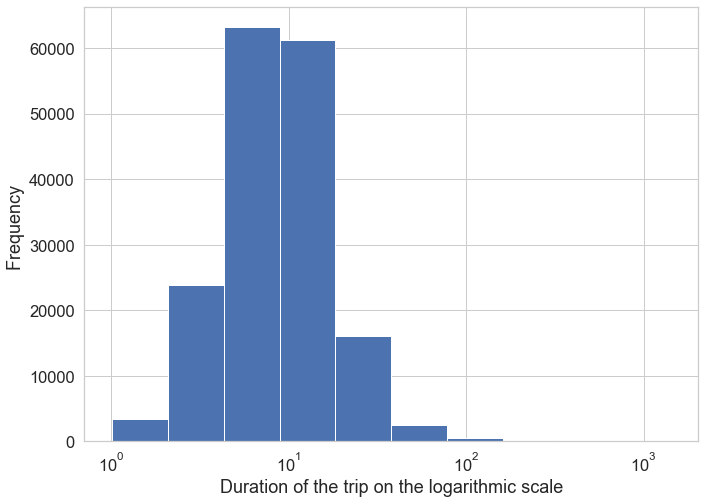

In [67]:
# exploring the duration time in minutes using the log scale
x = df_copy.duration_min
bins = 10
histogram, bins = np.histogram(x, bins=bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')
plt.ylabel('Frequency ')
plt.xlabel('Duration of the trip on the logarithmic scale')

Text(0.5, 0, 'Dataset under the study')

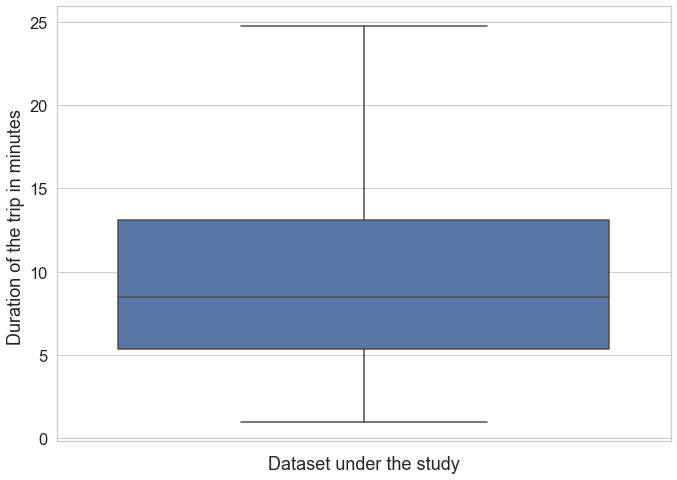

In [69]:
sns.boxplot(data=df_copy,  y='duration_min', showfliers=False)
plt.ylabel('Duration of the trip in minutes ')
plt.xlabel('Dataset under the study')

In [46]:
df_copy.duration_min.quantile([.1, .5, .9])

0.1     3.550000
0.5     8.483333
0.9    19.266667
Name: duration_min, dtype: float64

In [47]:
df_copy.duration_min.quantile([.1, .5, .9])

0.1     3.550000
0.5     8.483333
0.9    19.266667
Name: duration_min, dtype: float64

In [48]:
df_copy.duration_min.quantile([0.99])

0.99    51.872333
Name: duration_min, dtype: float64

<b>Comment:</b> Most trips are about 3-20 minutes. If an user wants to be in TOP 1 of most fit users, this user should use the bike for at least 53 minutes. This summary statistics may be used to promote the gamification of this bikes to spread healthy lifestyle among bike users.

<b>distance_between_stations</b> 

Text(0.5, 0, 'Distance between starting and ending stations in km')

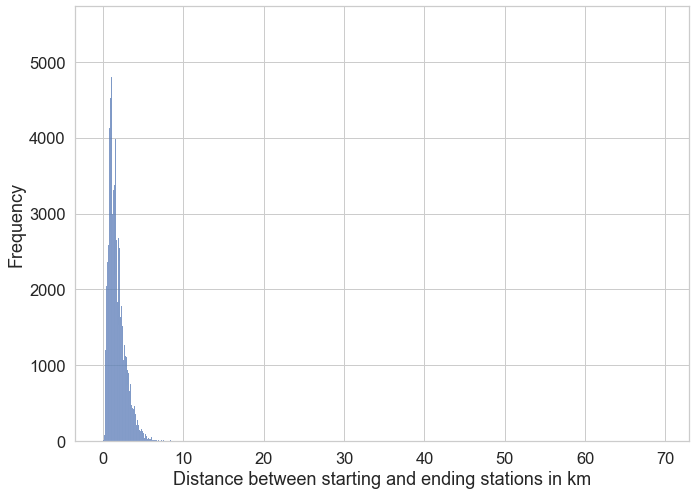

In [71]:
# exploring the duration time in minutes
sns.histplot(data=df_copy, x="distance_between_stations")
plt.ylabel('Frequency')
plt.xlabel('Distance between starting and ending stations in km')

Text(0.5, 0, 'Dataset under the study')

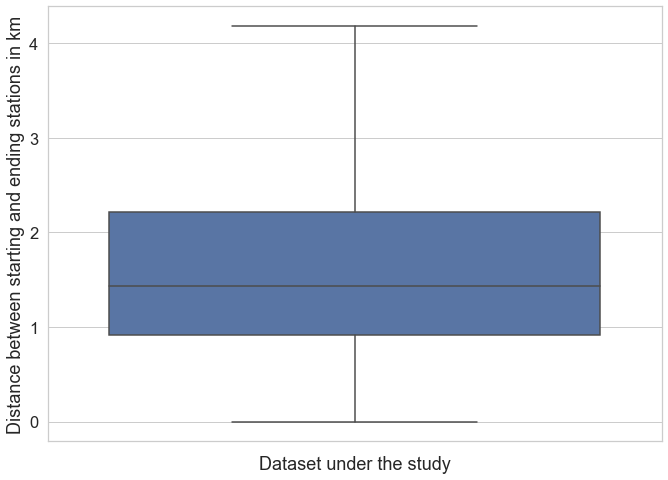

In [72]:
# exploring the duration time in minutes using the log scale
sns.boxplot(data=df_copy,  y='distance_between_stations', showfliers=False)
plt.ylabel('Distance between starting and ending stations in km')
plt.xlabel('Dataset under the study')

In [51]:
df_copy.distance_between_stations.quantile([.1, .5, .9])

0.1    0.60
0.5    1.43
0.9    3.20
Name: distance_between_stations, dtype: float64

In [52]:
df_copy.distance_between_stations.quantile([0.99])

0.99    5.05
Name: distance_between_stations, dtype: float64

<b>Comment:</b> For the distance_between_stations, we could have expected similar insigths as in the case of the duration time variable. These variables are probably highly correlated.  Most trips are between 0.6 km and 3.2 km. If an user wants to be in TOP 1 of most fit users, this user should use the bike for at least 5.1 km.

In [53]:
df_copy.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'day', 'year', 'duration_min', 'age',
       'age_group', 'age_group2', 'distance_between_stations'],
      dtype='object')

### Bivariate Exploration

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Age of the users')

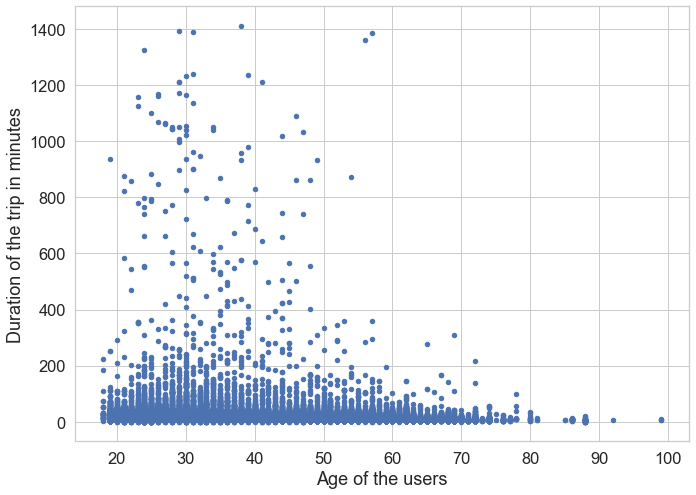

In [73]:
df_copy.plot.scatter(x='age', y='duration_min')
plt.ylabel('Duration of the trip in minutes')
plt.xlabel('Age of the users')

<b>Comment:</b> As excepted the younger we are more we can use bike. We should notive later on the negative correlation between age and duration of trips.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Distance between starting and ending stations in km')

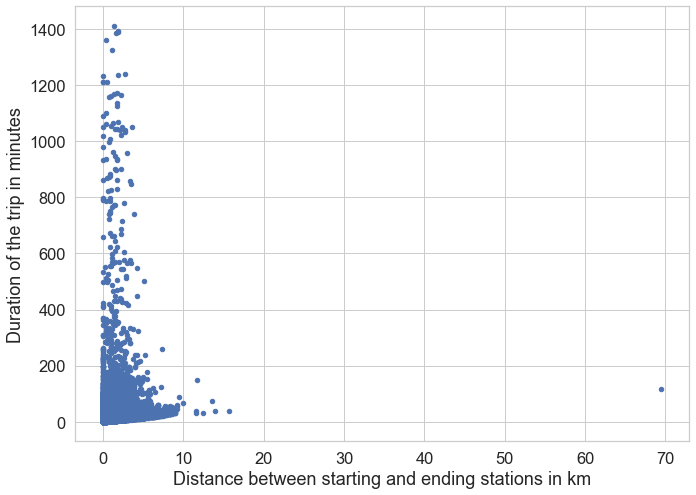

In [74]:
df_copy.plot.scatter(x='distance_between_stations', y='duration_min')
plt.ylabel('Duration of the trip in minutes')
plt.xlabel('Distance between starting and ending stations in km')

<b>Comment:</b> We have expected the strong positive correlation between duration in minutes and distancce between starting station and the ending station.

Text(0.5, 0, 'Types of users')

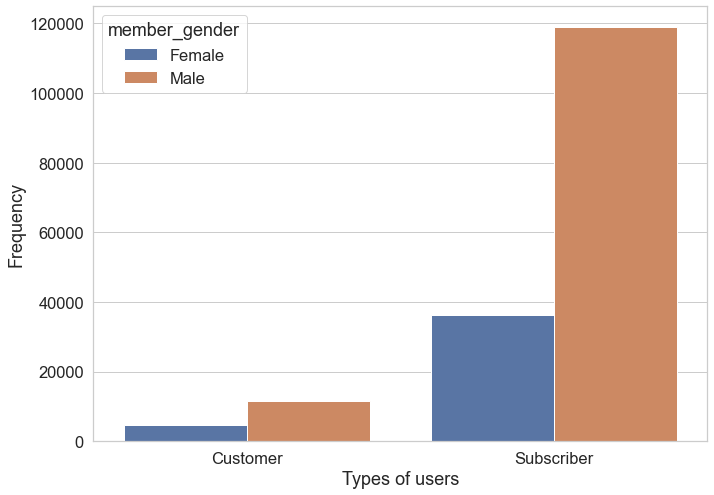

In [76]:
sns.countplot(x="user_type", hue="member_gender", data=df_copy)
plt.ylabel('Frequency')
plt.xlabel('Types of users')

<b>Comment:</b> There are far more men than women who use bikes among customers as well as subscribers.

Text(0.5, 0, 'Frequency')

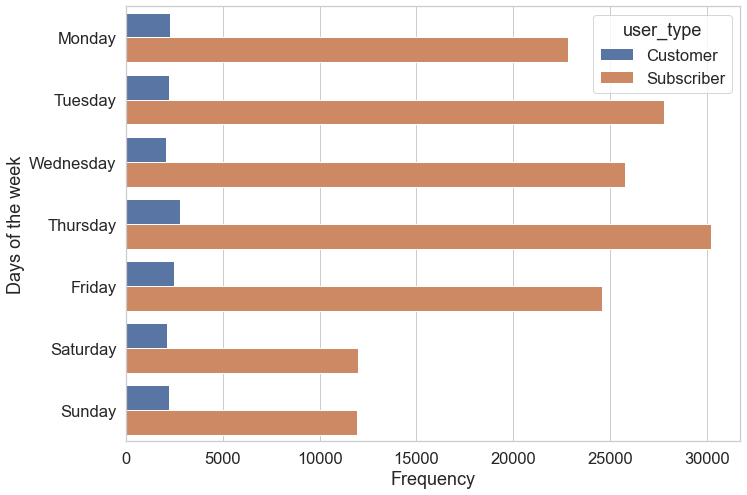

In [77]:
sns.countplot(y="day", hue="user_type", data=df_copy, order=list(days_dic.values()))
plt.ylabel('Days of the week')
plt.xlabel('Frequency')

<b>Comment:</b> Subribers tend to have different usage habits as there is a wider gap between Friday and Saturday for Subscribers than for Customers.

### Multivariate Exploration

In [58]:
df_copy.member_gender.value_counts()

Male      130443
Female     40791
Name: member_gender, dtype: int64

### Do women use more bikes than men during week days?

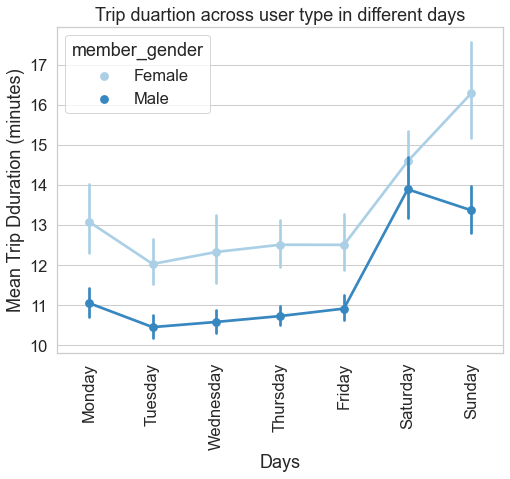

In [59]:
fig = plt.figure(figsize = [8,6])
sns.pointplot(data = df_copy, x = 'day', y = 'duration_min', hue = 'member_gender', palette = 'Blues',
             order=list(days_dic.values()))
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (minutes)')
plt.xlabel('Days')
plt.xticks(rotation = 90)
plt.show();

<b>Comment:</b> For some reason, women use longer bikes on Sundays than man.

### Do older people use more bikes than younger people during week days?

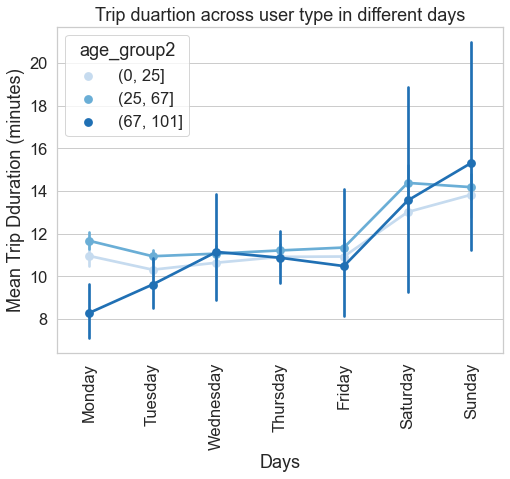

In [60]:
fig = plt.figure(figsize = [8,6])
sns.pointplot(data = df_copy, x = 'day', y = 'duration_min', hue ='age_group2', palette = 'Blues'
             , order=list(days_dic.values()))
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (minutes)')
plt.xlabel('Days')
plt.xticks(rotation = 90)
plt.show();

<b>Comment:</b> All group ages, use mostly bikes on weekends. I was expecting retired old people to use bikes more during weekdays, but they probably  use it during weekends with younger folks.

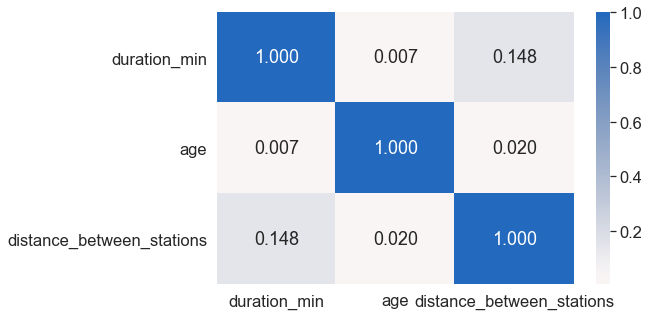

In [61]:
numeric_vars = ['duration_min','age','distance_between_stations']
plt.figure(figsize = [8, 5])
sns.heatmap(df_copy[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

The correlation between features is very weak and can be neglected.

### Were there any interesting or surprising interactions between variables?

Older people have similar duration time of trips as younger people. Women use bikes longer on Sundays than men. Even this seemingly simple dataset had some serious errors due to unrealistic outliers regarding for age of 143, which means that the verification process should double check the data we put into the system. I was expecting stronger positive correlation between distances between stations and duration of trips.

In [62]:
df_copy.to_csv('df_clean.csv', index=False)

In [63]:
!jupyter nbconvert Analyses_Ford_GoBike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Analyses_Ford_GoBike.ipynb to slides
[NbConvertApp] Writing 726821 bytes to Analyses_Ford_GoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\teodo\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\teodo\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\teodo\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\teodo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\teodo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fi